# 得られたembeddingを可視化したりする

In [95]:
import json
from pathlib import Path

In [96]:
embedding_dim=8
bow_threshold=10000
json_path= Path(f"../result/embeddings_{bow_threshold}_{embedding_dim}.json")

In [97]:
with json_path.open("r") as f:
    embeddings=json.load(f)

In [98]:
embeddings

{'capo': {'capo0': [-0.032704759389162064,
   -0.03392348811030388,
   -0.041662879288196564,
   0.02466939389705658,
   -0.028732426464557648,
   0.033674366772174835,
   -0.02698836289346218,
   -0.059981659054756165],
  'capo1': [0.04086771234869957,
   0.04646647348999977,
   -0.06187903508543968,
   -0.014015750959515572,
   0.05240894854068756,
   -0.0033026905730366707,
   -0.060563694685697556,
   -0.03207661956548691],
  'capo2': [0.039411623030900955,
   0.03453795611858368,
   -0.014579328708350658,
   0.050754815340042114,
   0.036991093307733536,
   0.01430797204375267,
   0.0013079560594633222,
   -0.002948142820969224],
  'capo3': [0.017677849158644676,
   0.04294221103191376,
   -0.03524398431181908,
   -0.04251010715961456,
   0.05712592601776123,
   -0.02344915084540844,
   0.02664530836045742,
   0.059563469141721725],
  'capo4': [-0.04160243272781372,
   0.03850145265460014,
   -0.005813950672745705,
   -0.040117740631103516,
   0.0538114458322525,
   0.048751633614

In [99]:
import numpy as np
from sklearn.decomposition import PCA  
def get_pca_embeddings(embeddings,n_compenents):
    keys=[]
    embeddings_mat=[]
    for kind, em in embeddings.items(): 
        for key, embedding in em.items():
            keys.append(key)
            embeddings_mat.append(embedding)
        
    pca = PCA(n_components=n_compenents)                     # 3次元に圧縮するPCAインスタンスを作成
    X = pca.fit_transform(np.array(embeddings_mat))
    
    result={}
    for i in range(len(keys)):
        result[keys[i]]=X[i]
    return result


In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_embeddings(embeddings,target_chords):
    if len(list(embeddings.values())[0]) != 2:
        raise Exception("Invalid embeddings given.")
    x1=[]
    x2=[]
    for target_chord in target_chords:
        x1.append(embeddings[target_chord][0])
        x2.append(embeddings[target_chord][1])

    for (i,j,k) in zip(x1,x2,target_chords):
            plt.plot(i,j)
            plt.annotate(k, xy=(i, j))
    plt.show()

In [ ]:
import numpy as np

def search_similar_embeddings(target, embeddings,top_k=1):
    """検索クエリのtargetとのcos類似度が大きいembeddingを検索対象embeddingsから探して上位k番目まで返す."""
    result={}
    for key, embedding in embeddings.items():
        cos=cos_similarity(embedding,target)
        result[key]=cos
    return sorted(result.items(), key=lambda x:x[1],reverse=True)[:top_k]


def cos_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

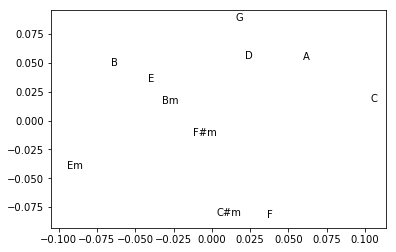

In [101]:
pca_embeddings=get_pca_embeddings(embeddings,2) 
plot_embeddings(pca_embeddings,target_chords=["A","B","C","D","E","F","G","Bm","C#m","Em","F#m"])

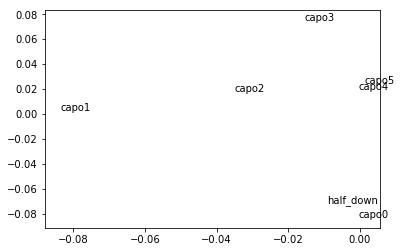

In [102]:
plot_embeddings(pca_embeddings,target_chords=embeddings["capo"].keys())

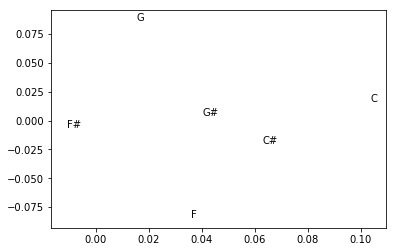

In [103]:
plot_embeddings(pca_embeddings,target_chords=["C#","F#","G#","C","F","G"])